In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90,90, size =1500)
lngs = np.random.uniform(-180-180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

45.29229056240081 -179.27212802567317
-3.015039791044245 -130.05418811293856
-23.369551430770287 -63.002675761072965
64.29322012788822 -88.73302932000189
-52.85028439961633 -262.1101381400162
-57.03883229259581 -181.57453904105648
-85.34370056702576 -130.84254812200544
-16.85189737629743 -139.303027652559
-63.54052699495817 -7.718860165189426
44.70561082922316 -76.0038189914776
4.651039186573854 -32.72312418890243
-8.891785294961196 -32.06523845314331
-3.6128925758942216 -282.2121596589426
-8.700222045990756 -131.65777275653244
-66.35337643109655 -117.17322168323179
4.936173670295133 -55.56321242924906
-86.2213165259794 -338.5620995768692
49.066111988077296 -207.71244485328037
-13.262499540281212 -294.33351601559
-13.9167760756294 -333.43205385475443
52.06265832860228 -16.53172280115291
-76.4493799730483 -218.87939489636204
-27.030373154571706 -158.84889513063698
56.58982291734725 -282.93390335436175
3.1973046534554044 -240.84901856297364
-27.0579851083856 -228.92302365956013
67.121094

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, add it to the list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)




245

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
#create an empty list to hold the city data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval       
-------------------------------


NameError: name 'cities' is not defined

In [6]:
len(city_data)

NameError: name 'city_data' is not defined

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,82.38,61,0,1.99,US,2022-11-15 21:59:48
1,Mataura,-46.1927,168.8643,67.39,50,100,3.40,NZ,2022-11-15 21:59:49
2,La Ronge,55.1001,-105.2842,26.85,80,100,5.75,CA,2022-11-15 21:59:49
3,Egvekinot,66.3167,-179.1667,25.52,97,100,20.27,RU,2022-11-15 21:59:50
4,Puebloviejo,10.9938,-74.2844,89.78,66,40,3.44,CO,2022-11-15 21:59:50
5,Los Llanos De Aridane,28.6585,-17.9182,73.13,27,0,6.91,ES,2022-11-15 21:59:51
6,Vaini,-21.2000,-175.2000,77.16,94,40,8.05,TO,2022-11-15 21:59:51
7,Rikitea,-23.1203,-134.9692,74.95,81,100,16.98,PF,2022-11-15 21:59:51
8,Bull Savanna,17.8868,-77.5902,79.52,79,41,6.24,JM,2022-11-15 21:59:52
9,Tamandare,-8.7597,-35.1047,77.43,82,21,7.83,BR,2022-11-15 21:59:52


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-11-15 21:59:48,22.0752,-159.3190,82.38,61,0,1.99
1,Mataura,NZ,2022-11-15 21:59:49,-46.1927,168.8643,67.39,50,100,3.40
2,La Ronge,CA,2022-11-15 21:59:49,55.1001,-105.2842,26.85,80,100,5.75
3,Egvekinot,RU,2022-11-15 21:59:50,66.3167,-179.1667,25.52,97,100,20.27
4,Puebloviejo,CO,2022-11-15 21:59:50,10.9938,-74.2844,89.78,66,40,3.44
5,Los Llanos De Aridane,ES,2022-11-15 21:59:51,28.6585,-17.9182,73.13,27,0,6.91
6,Vaini,TO,2022-11-15 21:59:51,-21.2000,-175.2000,77.16,94,40,8.05
7,Rikitea,PF,2022-11-15 21:59:51,-23.1203,-134.9692,74.95,81,100,16.98
8,Bull Savanna,JM,2022-11-15 21:59:52,17.8868,-77.5902,79.52,79,41,6.24
9,Tamandare,BR,2022-11-15 21:59:52,-8.7597,-35.1047,77.43,82,21,7.83


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


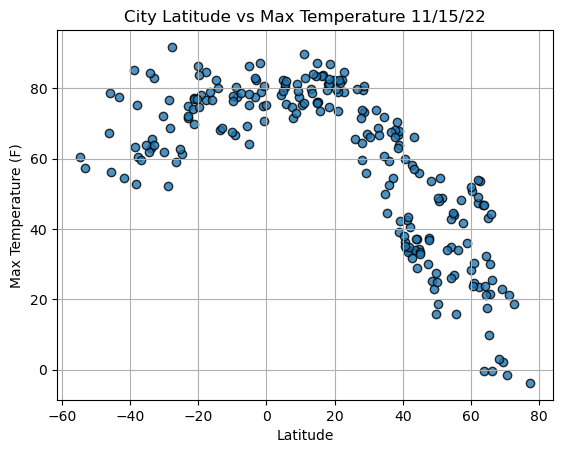

In [19]:
#import time module
import time

#build the scatter plot
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

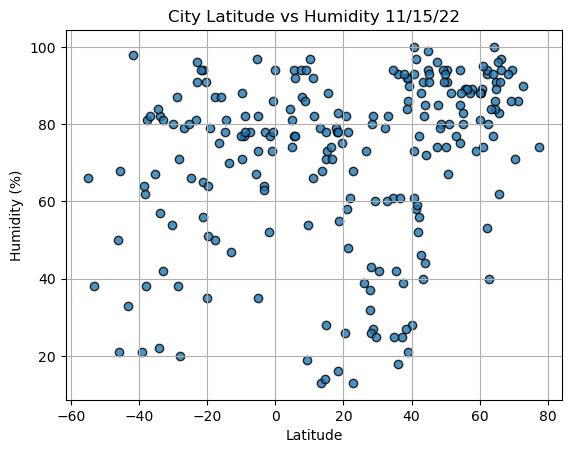

In [20]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

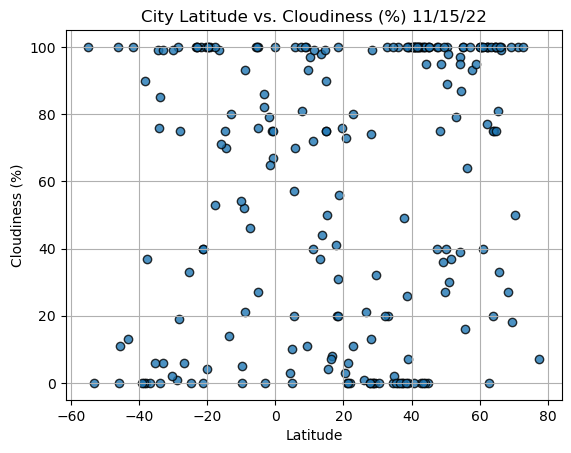

In [21]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

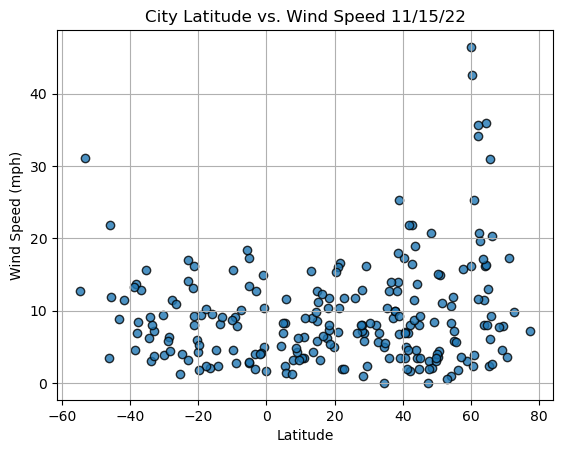

In [22]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [23]:
#import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [25]:
index13 = city_data_df.loc[13]
index13

City               Guerrero Negro
Country                        MX
Date          2022-11-15 21:59:54
Lat                       27.9769
Lng                     -114.0611
Max Temp                    73.67
Humidity                       26
Cloudiness                     13
Wind Speed                   7.16
Name: 13, dtype: object

In [27]:
city_data_df["Lat"]>=0

0       True
1      False
2       True
3       True
4       True
       ...  
221    False
222    False
223     True
224     True
225    False
Name: Lat, Length: 226, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-11-15 21:59:48,22.0752,-159.3190,82.38,61,0,1.99
2,La Ronge,CA,2022-11-15 21:59:49,55.1001,-105.2842,26.85,80,100,5.75
3,Egvekinot,RU,2022-11-15 21:59:50,66.3167,-179.1667,25.52,97,100,20.27
4,Puebloviejo,CO,2022-11-15 21:59:50,10.9938,-74.2844,89.78,66,40,3.44
5,Los Llanos De Aridane,ES,2022-11-15 21:59:51,28.6585,-17.9182,73.13,27,0,6.91


In [31]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

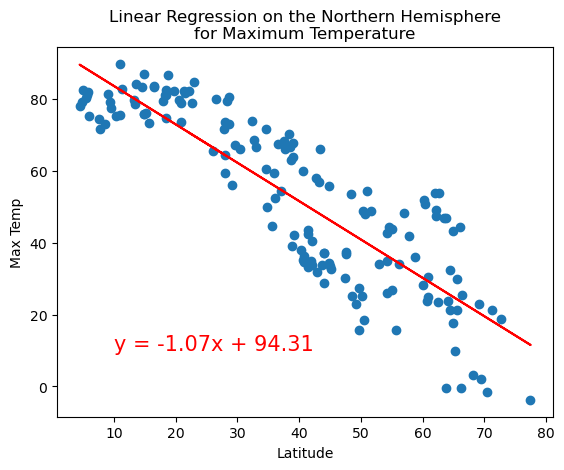

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for Maximum Temperature', 'Max Temp',(10,10))


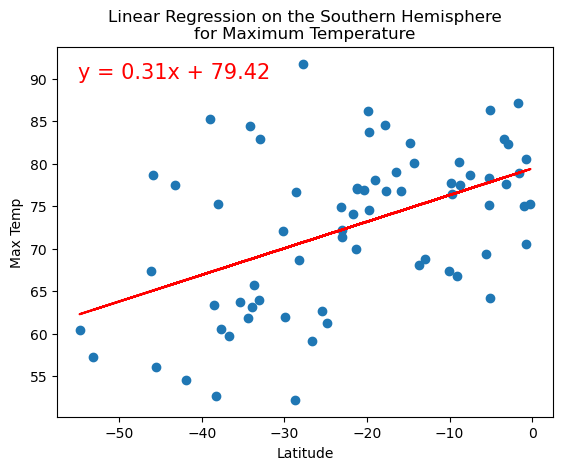

In [53]:
# Linear regression on the souther Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for Maximum Temperature', 'Max Temp',(-55,90))



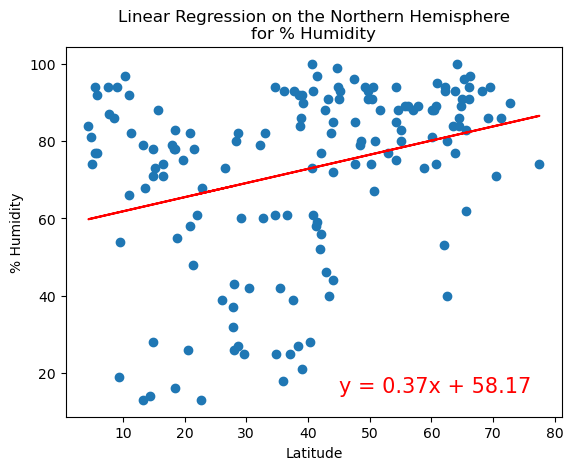

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for % Humidity', '% Humidity',(45,15))

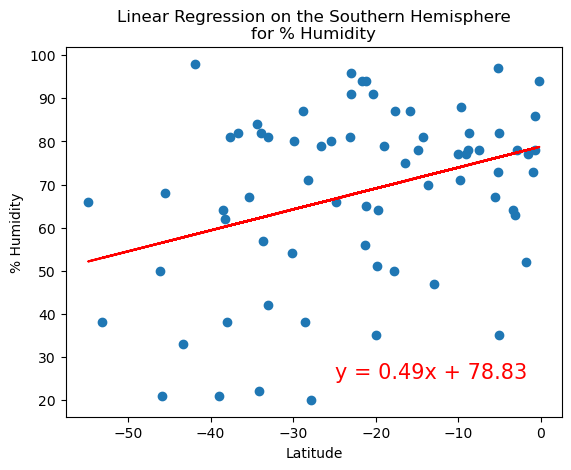

In [66]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for % Humidity', '% Humidity',(-25,25))

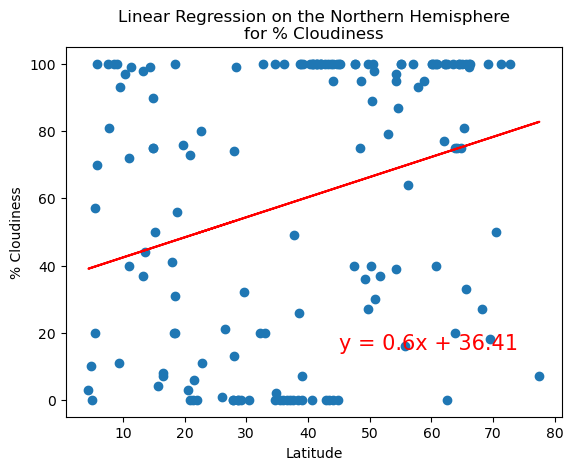

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for % Cloudiness', '% Cloudiness',(45,15))

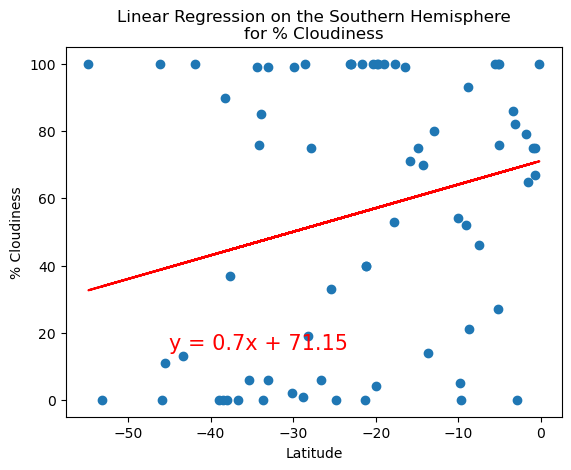

In [58]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for % Cloudiness', '% Cloudiness',(-45,15))

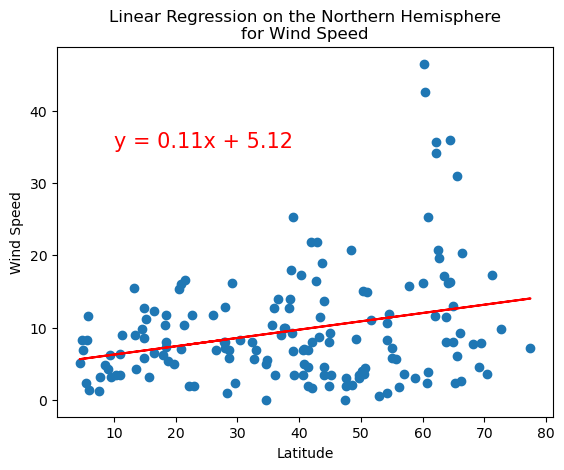

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for Wind Speed', 'Wind Speed',(10,35))

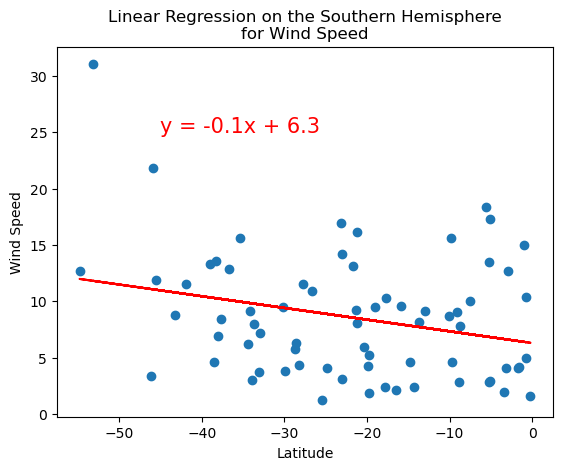

In [63]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for Wind Speed', 'Wind Speed',(-45,25))